In [869]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [871]:
data = pd.read_csv(r'C:\Users\yasmi\OneDrive\Documents\Data science courses\Diabetes_analysis\Diabetes dataset.csv')

In [873]:
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [875]:
data.value_counts()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin  BMI   DiabetesPedigreeFunction  Age  Outcome
0            57       60             0              0        21.7  0.735                     67   0          1
             67       76             0              0        45.3  0.194                     46   0          1
5            103      108            37             0        39.2  0.305                     65   0          1
             104      74             0              0        28.8  0.153                     48   0          1
             105      72             29             325      36.9  0.159                     28   0          1
                                                                                                            ..
2            84       50             23             76       30.4  0.968                     21   0          1
             85       65             0              0        39.6  0.930                     27   0          1
      

In [877]:
print(data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [879]:
print (data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

In [881]:
data[(data['Pregnancies'] == 0) & (data['Outcome'] == 0)] #Number of records having 0 pregnancies and having diabetes outcome as 0 (no diabetes)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
57,0,100,88,60,110,46.8,0.962,31,0
58,0,146,82,0,0,40.5,1.781,44,0
59,0,105,64,41,142,41.5,0.173,22,0
83,0,101,65,28,0,24.6,0.237,22,0
102,0,125,96,0,0,22.5,0.262,21,0
...,...,...,...,...,...,...,...,...,...
682,0,95,64,39,105,44.6,0.366,22,0
697,0,99,0,0,0,25.0,0.253,22,0
713,0,134,58,20,291,26.4,0.352,21,0
727,0,141,84,26,0,32.4,0.433,22,0


In [883]:
data[data['Pregnancies'] == 0].groupby('Pregnancies').mean() #not prone to suffer from diabetes

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.0,67.153153,22.27027,81.675676,34.29009,0.520838,27.603604,0.342342


In [885]:
data.groupby('Pregnancies').mean()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
0,123.000000,67.153153,22.270270,81.675676,34.290090,0.520838,27.603604,0.342342
1,112.748148,67.792593,24.437037,98.674074,31.372593,0.486496,27.370370,0.214815
2,110.796117,63.252427,21.601942,85.844660,30.583495,0.491660,27.194175,0.184466
3,123.586667,66.586667,20.080000,87.453333,30.425333,0.432147,29.026667,0.360000
4,125.117647,70.029412,15.882353,69.441176,32.141176,0.446353,32.779412,0.338235
5,118.859649,76.210526,17.385965,57.298246,33.192982,0.396421,39.035088,0.368421
6,120.800000,68.420000,17.640000,63.580000,30.290000,0.429520,39.340000,0.320000
7,136.444444,70.777778,20.288889,84.466667,32.631111,0.443622,41.111111,0.555556
8,131.736842,75.184211,17.315789,92.815789,31.568421,0.504711,45.368421,0.578947


In [887]:
data[data['Pregnancies'] == 0]['Glucose'].mode()

0    102
Name: Glucose, dtype: int64

In [889]:
# Checking for the columns having value 0 present

# Outhere of total 8 feature variables, 6 variables have value 0 present in them. BElow are the columns:
# Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin and BMI

# We need to fill the 0s in those columns with mean/median/mode.

len(data[data['Glucose'] == 0])

5

In [891]:
len(data[data['BloodPressure'] == 0])

35

In [893]:
len(data[data['SkinThickness'] == 0])

227

In [895]:
len(data[data['Insulin'] == 0])

374

In [897]:
len(data[data['BMI'] == 0])

11

In [899]:
len(data[data['DiabetesPedigreeFunction'] == 0])

# No missing values (0 in this case) are present in this column

0

In [901]:
len(data[data['Age'] == 0])

# No missing values (0 in this case) are present in this column

0

In [903]:
len(data[data['Pregnancies'] == 0])

111

In [905]:
len(data['Pregnancies'])

768

<Axes: xlabel='Outcome', ylabel='Pregnancies'>

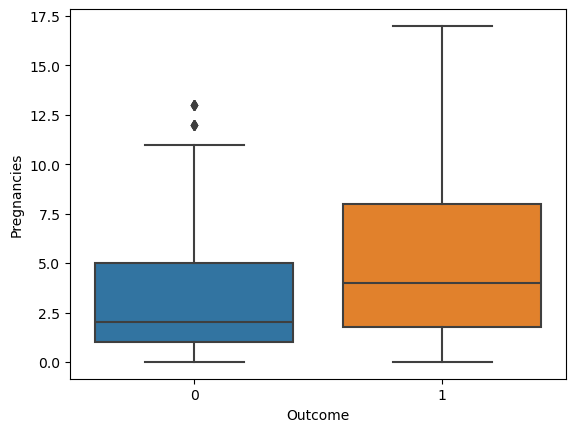

In [907]:
sns.boxplot(x='Outcome', y='Pregnancies', data=data)

# Conclusion: Both the distributions of Outcome irrespective of whether 0 or 1 are positively skewed. 
# The median of 1 is more.

# Outliers are there in this column. We can fill missing values with mean, because no of outliers is less out of 768 
# data points in the distribution, and distance from the central tendancy (crowd of the data) is also less, that's why we 
# can ignore the outlier and fill the missing values with mean.

In [909]:
len(data[data['Glucose']==0]) #5 missing values are there in glucose column

5

<Axes: xlabel='Outcome', ylabel='Glucose'>

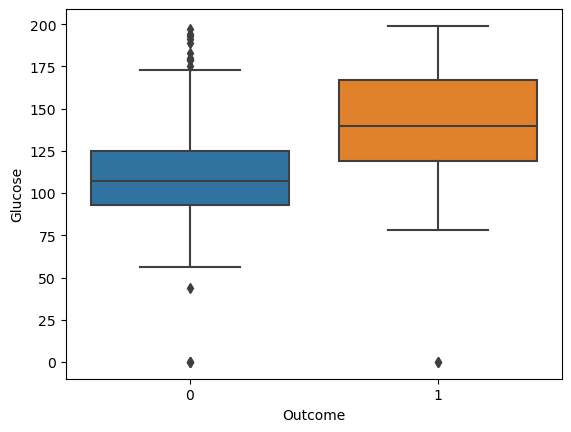

In [911]:
sns.boxplot(x='Outcome', y='Glucose', data=data) #outliers are there for glucose level w.r.t occurence of diabetes or not(target)

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

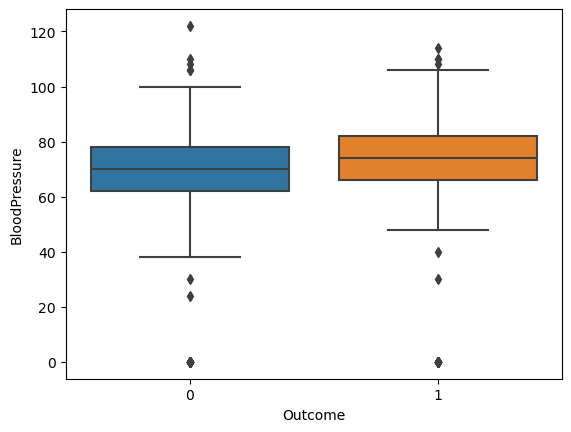

In [913]:
sns.boxplot(x='Outcome', y='BloodPressure', data=data)

<Axes: xlabel='Outcome', ylabel='SkinThickness'>

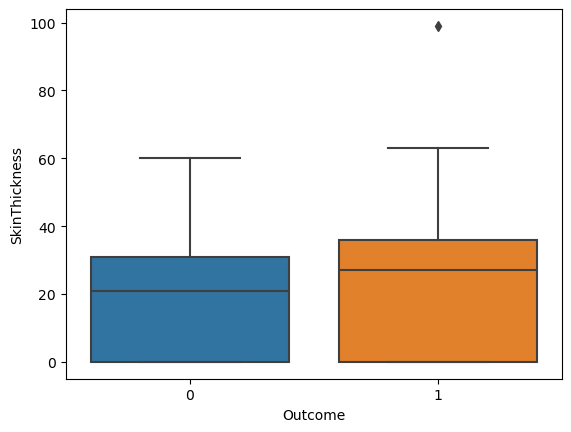

In [915]:
sns.boxplot(x='Outcome', y='SkinThickness', data=data)

<Axes: xlabel='Outcome', ylabel='Insulin'>

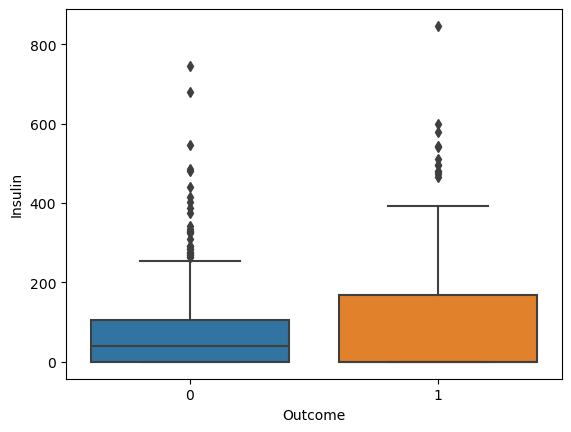

In [917]:
sns.boxplot(x='Outcome', y='Insulin', data=data)

<Axes: xlabel='Outcome', ylabel='BMI'>

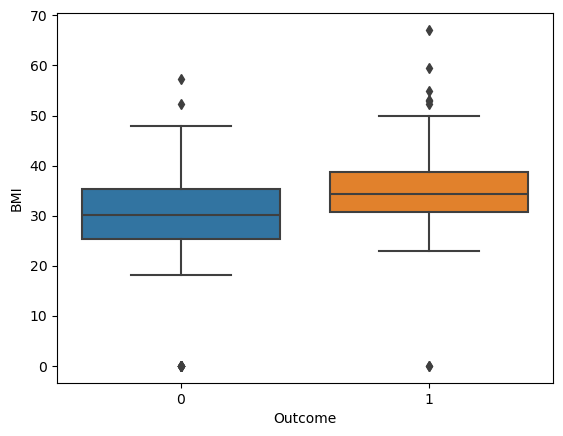

In [919]:
sns.boxplot(x='Outcome', y='BMI', data=data)

In [920]:
zero_columns = ['Pregnancies','Glucose','BloodPressure', 'SkinThickness', 'BMI', 'Insulin']

In [923]:
for column in zero_columns:
    median = data[column].median()
    data[column] = data[column].replace(0, median)
    
#found out missing values for those columns where occurence of 0 is not possible and they are the missing values in disguise. We are filling those missing values with the help of median because mean will be impacted with the presence of outliers.

In [925]:
len(data[data['Pregnancies'] == 0])

0

In [927]:
len(data[data['Glucose'] == 0])

0

In [929]:
len(data[data['BloodPressure'] == 0])

0

In [931]:
len(data[data['SkinThickness'] == 0])

0

In [933]:
len(data[data['Insulin'] == 0])

0

In [935]:
len(data[data['BMI'] == 0])

0

In [937]:
data.Outcome.value_counts()

# The dataset is not balanced.

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: xlabel='Outcome', ylabel='count'>

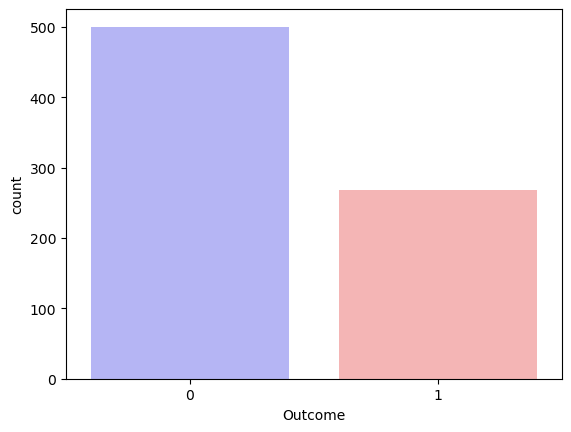

In [939]:
# Use countplot to check if the data set is balanced or not

sns.countplot(x='Outcome',data=data , palette = 'bwr')

In [941]:
categorical_columns = list(data.select_dtypes(include= ['object'])) #.dtypes.index)

In [943]:
categorical_columns

[]

In [945]:
numeric_columns = list(data.select_dtypes(exclude= ['object'])) #.dtypes.index)

In [947]:
numeric_columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [949]:
# Correlation between numerical columns.
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.149326,0.247530,0.060706,-0.059580,0.080540,-0.016151,0.538169,0.245466
Glucose,0.149326,1.000000,0.218937,0.172143,0.357573,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.247530,0.218937,1.000000,0.147809,-0.028721,0.281132,-0.002378,0.324915,0.165723
SkinThickness,0.060706,0.172143,0.147809,1.000000,0.238188,0.546951,0.142977,0.054514,0.189065
Insulin,-0.059580,0.357573,-0.028721,0.238188,1.000000,0.189022,0.178029,-0.015413,0.148457
BMI,0.080540,0.231400,0.281132,0.546951,0.189022,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.016151,0.137327,-0.002378,0.142977,0.178029,0.153506,1.000000,0.033561,0.173844
Age,0.538169,0.266909,0.324915,0.054514,-0.015413,0.025744,0.033561,1.000000,0.238356
Outcome,0.245466,0.492782,0.165723,0.189065,0.148457,0.312249,0.173844,0.238356,1.000000


<Axes: >

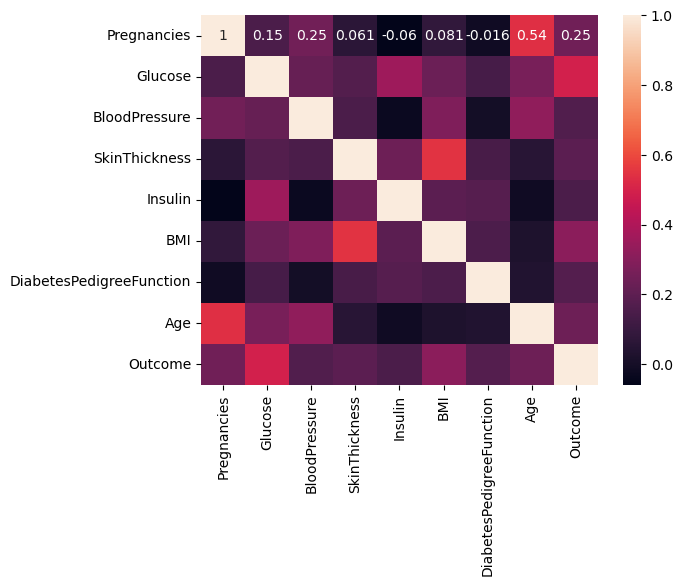

In [951]:
sns.heatmap(data.corr(), annot=True)
# No feature variables are highly correlated with each other. Hence, we will not remove any column here. 

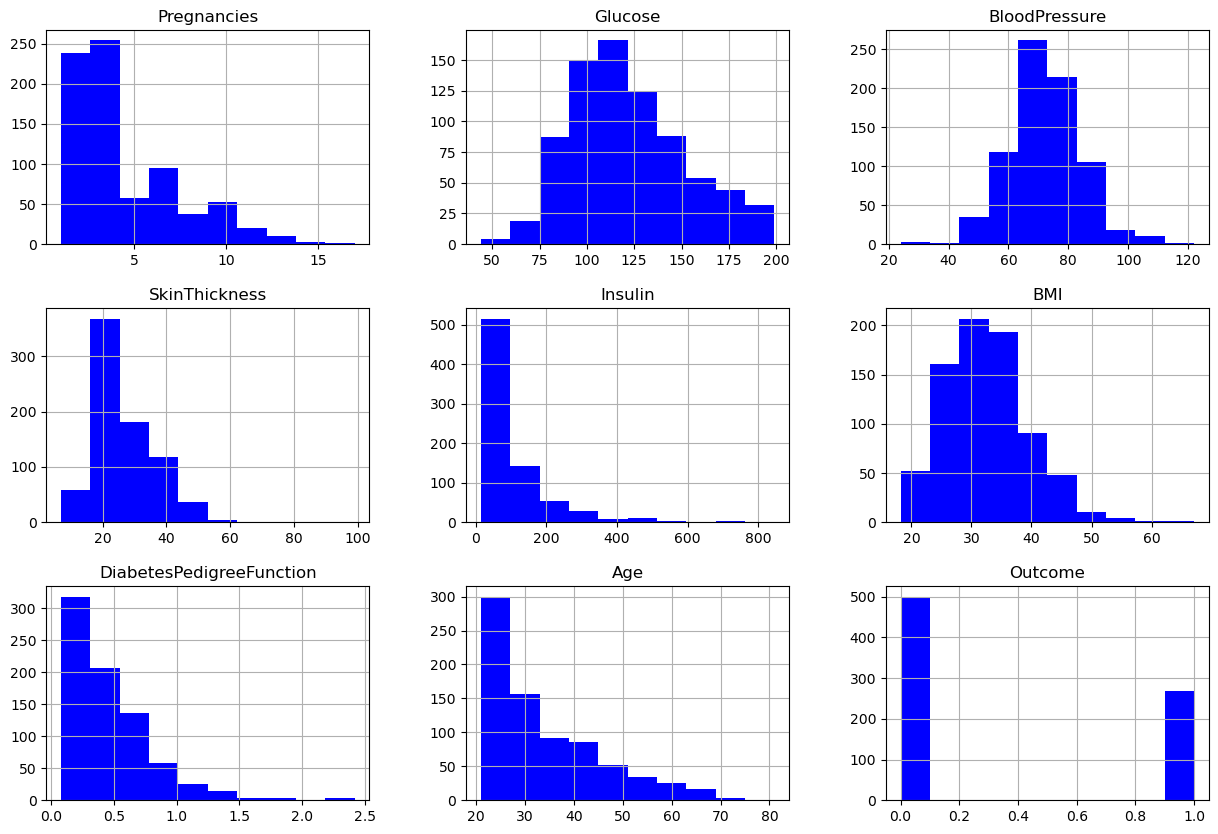

In [953]:
# Histogram for each feature
data.hist(bins=10, figsize=(15, 10), color='blue')
plt.show()

C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\yasmi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

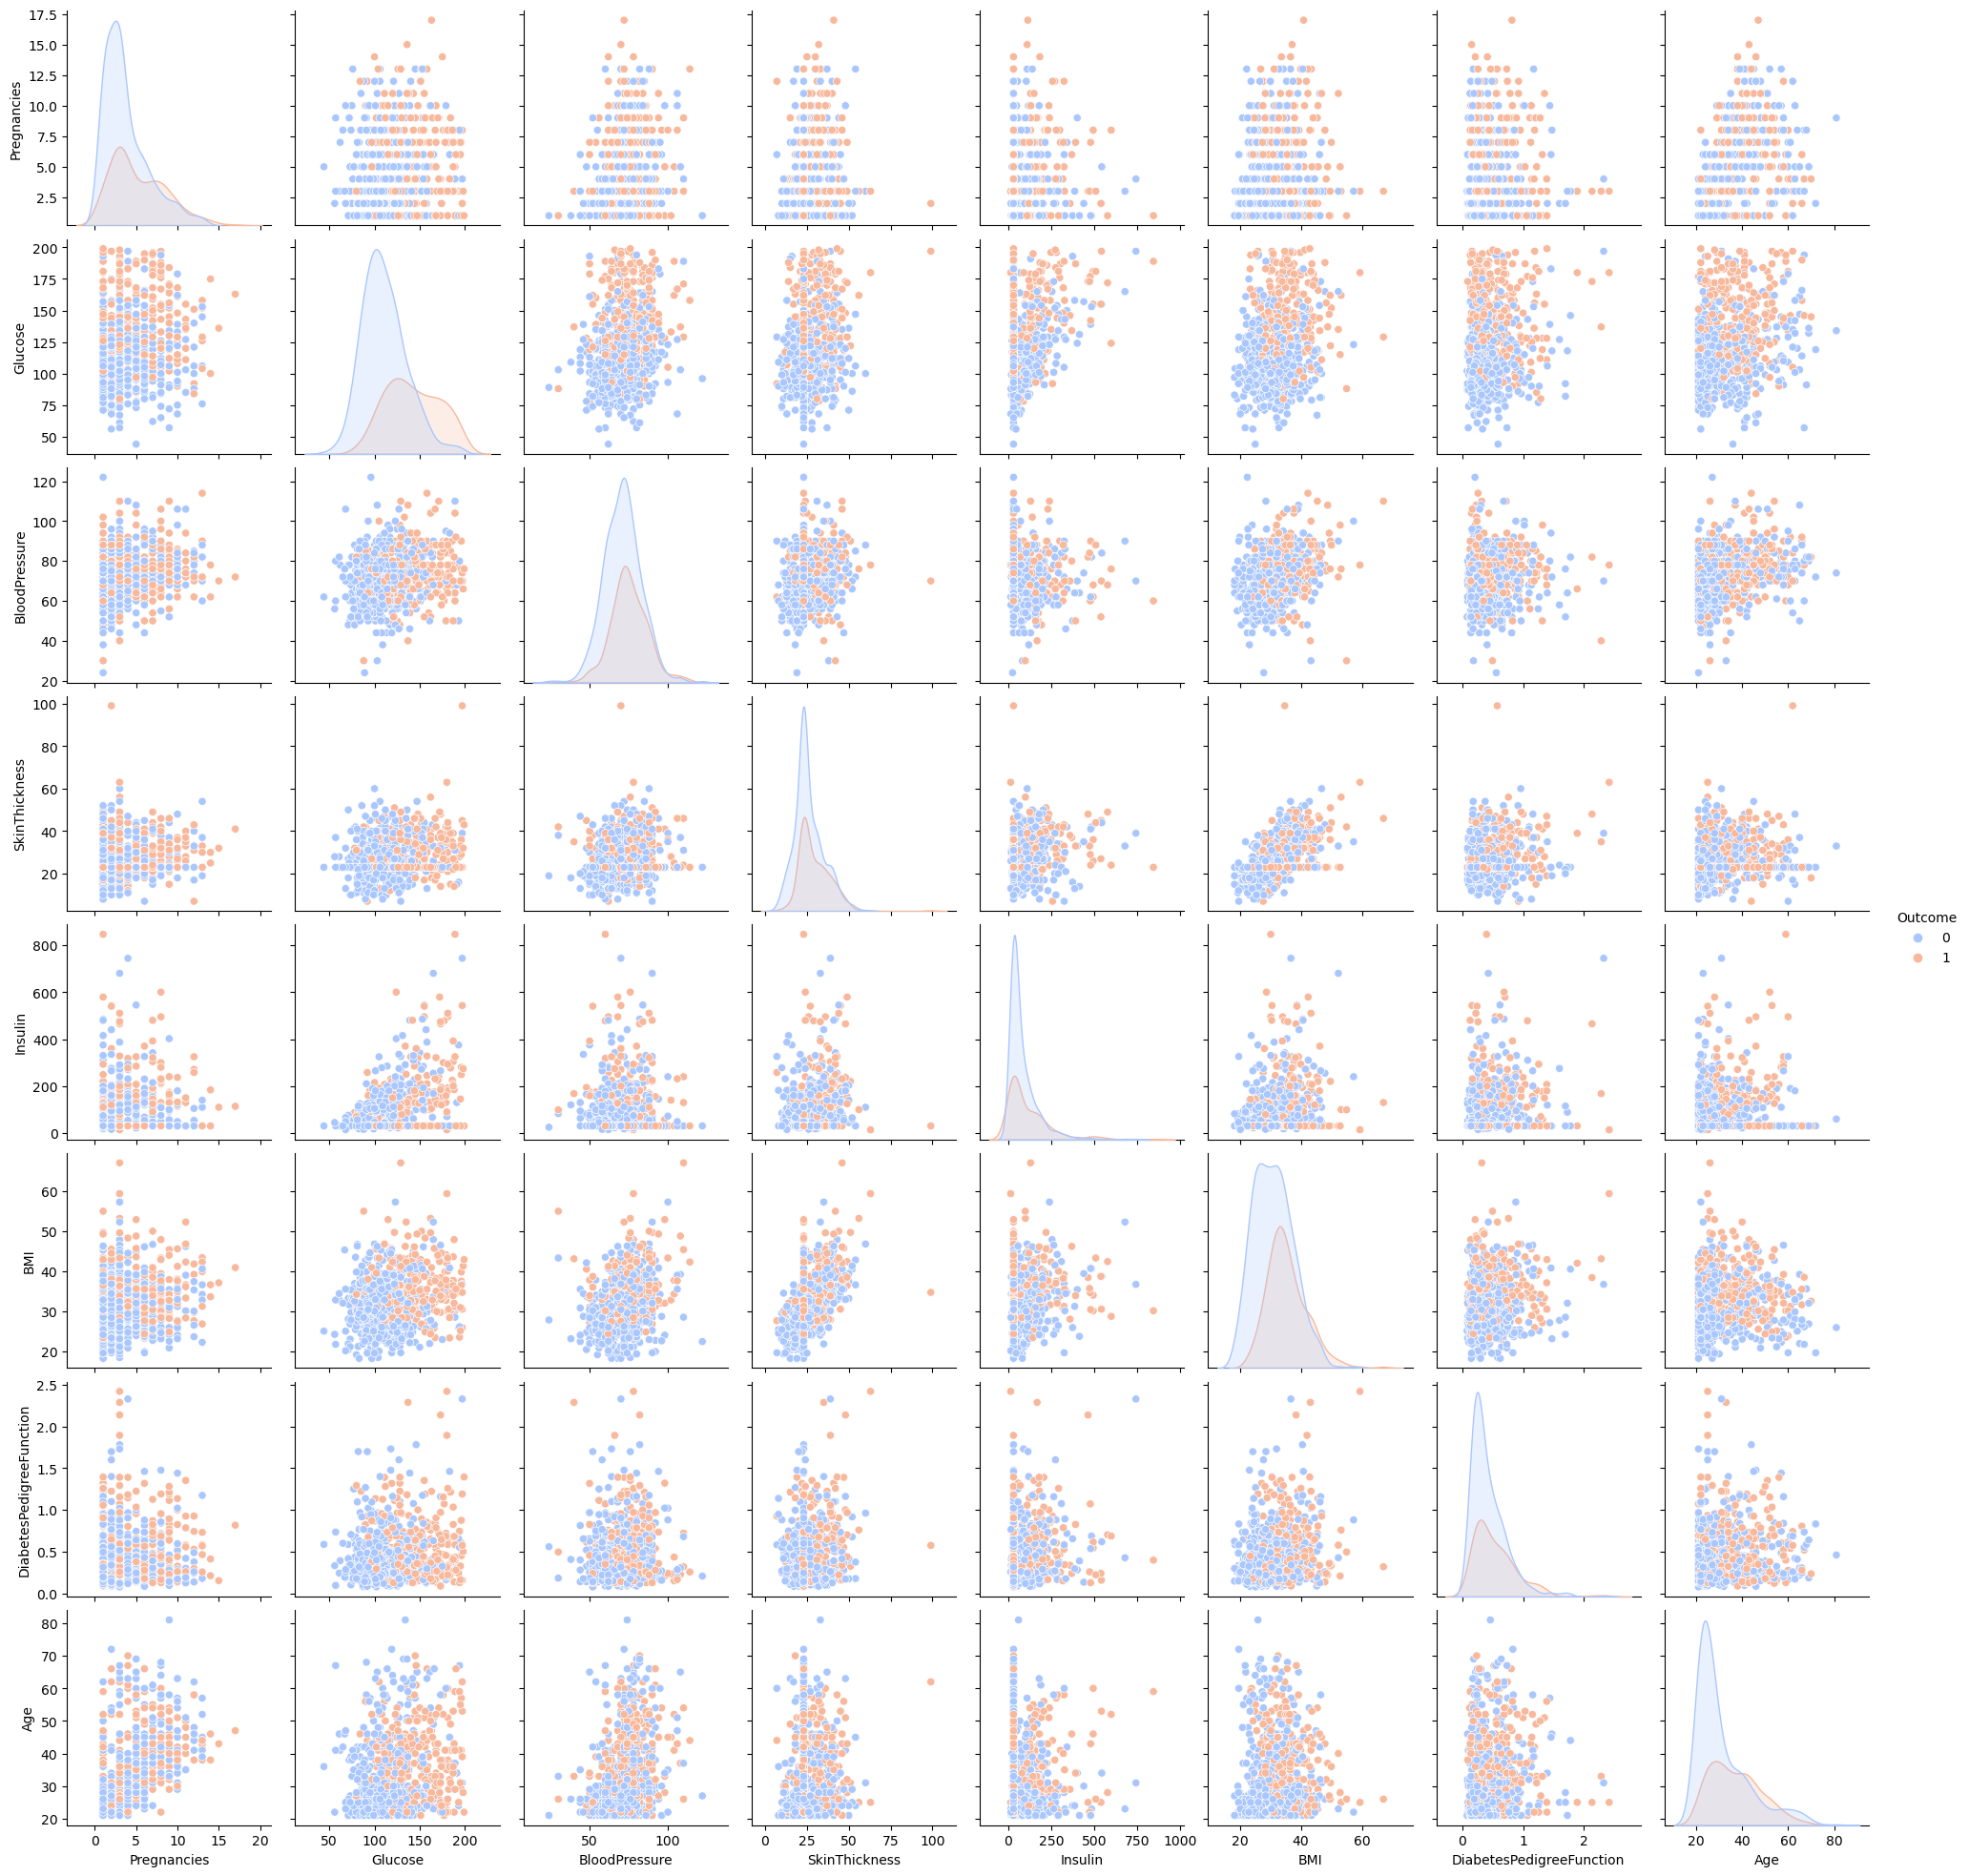

In [954]:
# Pairplot
sns.pairplot(data, hue='Outcome', palette='coolwarm')
plt.show()

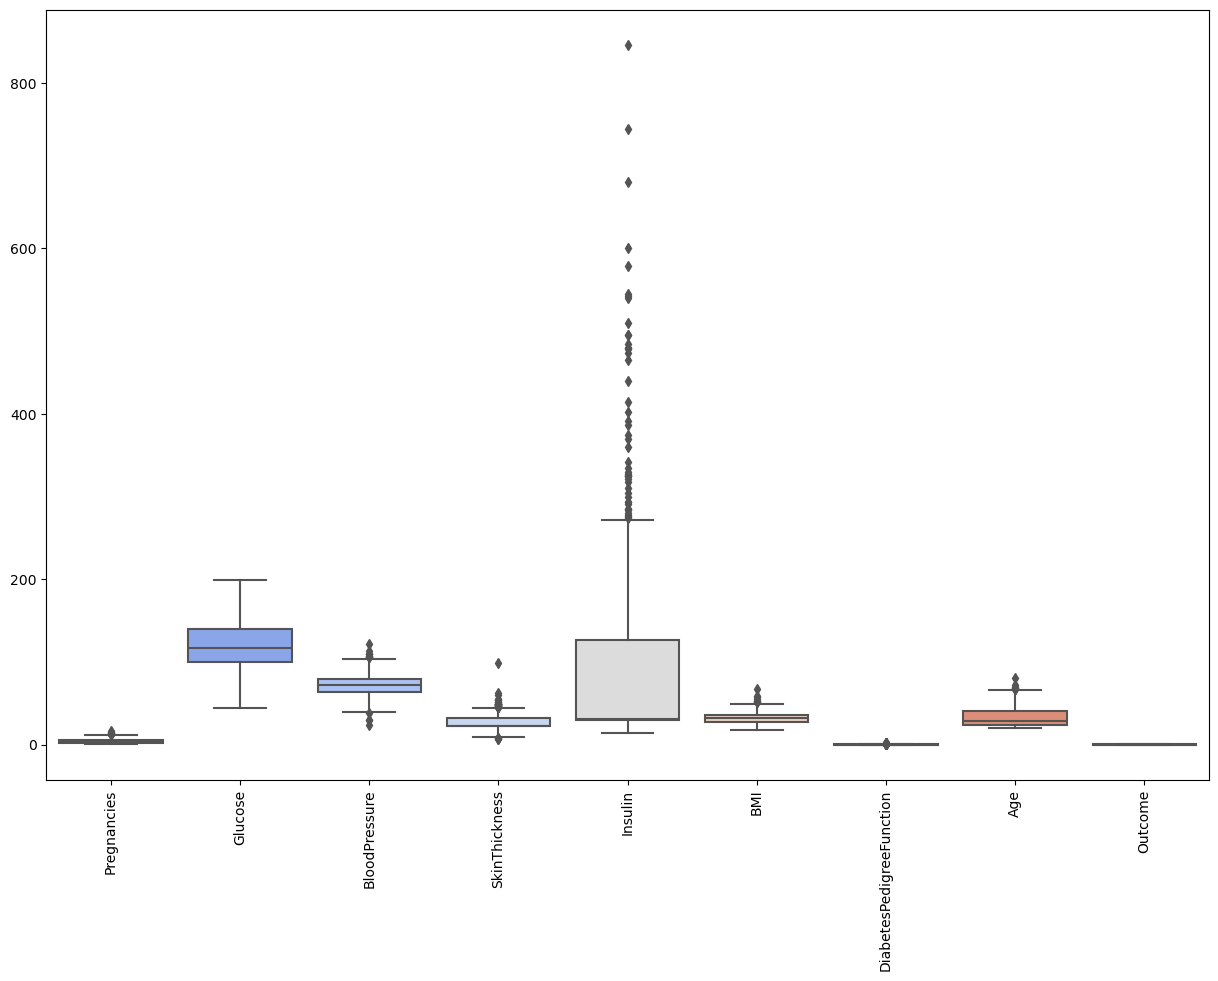

In [956]:
# Boxplot for each feature by Outcome
plt.figure(figsize=(15, 10))
sns.boxplot(data=data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

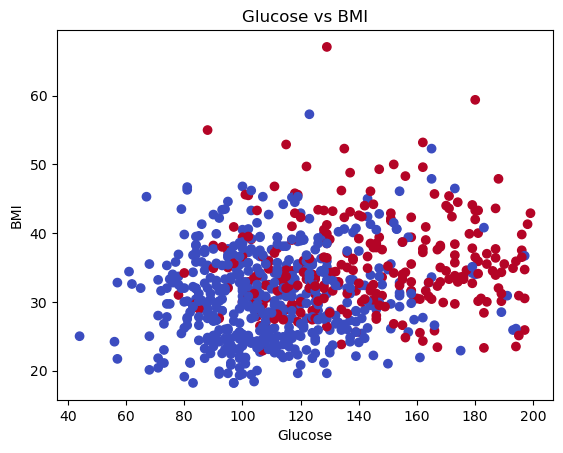

In [957]:
plt.scatter(data['Glucose'], data['BMI'], c=data['Outcome'], cmap='coolwarm')
plt.xlabel('Glucose')
plt.ylabel('BMI')
plt.title('Glucose vs BMI')
plt.show()

In [958]:
#dividing the data set into X & Y such that we can apply features scaling on X 

In [959]:
x = data.drop(columns=['Outcome'])

In [960]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.627,50
1,1,85,66,29,30.5,26.6,0.351,31
2,8,183,64,23,30.5,23.3,0.672,32
3,1,89,66,23,94.0,28.1,0.167,21
4,3,137,40,35,168.0,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.171,63
764,2,122,70,27,30.5,36.8,0.340,27
765,5,121,72,23,112.0,26.2,0.245,30
766,1,126,60,23,30.5,30.1,0.349,47


In [961]:
y = data['Outcome']

In [962]:
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [963]:
#apply features scaling on x

In [964]:
from sklearn.preprocessing import MinMaxScaler

In [965]:
scaler = MinMaxScaler()

In [966]:
scaled_data = scaler.fit_transform(x)

In [967]:
scaled_x = pd.DataFrame(scaled_data, 
                         columns=x.columns)

In [968]:
scaled_x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.3125,0.670968,0.489796,0.304348,0.019832,0.314928,0.234415,0.483333
1,0.0000,0.264516,0.428571,0.239130,0.019832,0.171779,0.116567,0.166667
2,0.4375,0.896774,0.408163,0.173913,0.019832,0.104294,0.253629,0.183333
3,0.0000,0.290323,0.428571,0.173913,0.096154,0.202454,0.038002,0.000000
4,0.1250,0.600000,0.163265,0.304348,0.185096,0.509202,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.5625,0.367742,0.530612,0.445652,0.199519,0.300613,0.039710,0.700000
764,0.0625,0.503226,0.469388,0.217391,0.019832,0.380368,0.111870,0.100000
765,0.2500,0.496774,0.489796,0.173913,0.117788,0.163599,0.071307,0.150000
766,0.0000,0.529032,0.367347,0.173913,0.019832,0.243354,0.115713,0.433333


In [969]:
#dataset with all the features have been scaled now. hence after apply min and max scaler all the values are between 0 and 1 

In [970]:
#breaking dataset to train and test to 75% train data and 25% test data 

In [971]:
x_train, x_test, y_train, y_test = train_test_split(scaled_x,y,test_size=0.25, random_state=91)

In [972]:
#apply the model on train data after importing the same

In [973]:
x_train, x_test, y_train, y_test

(     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
 349       0.2500  0.470968       0.571429       0.271739  0.019832  0.466258   
 113       0.1875  0.206452       0.387755       0.173913  0.019832  0.323108   
 564       0.1250  0.303226       0.571429       0.173913  0.019832  0.290389   
 620       0.0625  0.438710       0.632653       0.380435  0.175481  0.413088   
 505       0.5625  0.200000       0.591837       0.173913  0.019832  0.308793   
 ..           ...       ...            ...            ...       ...       ...   
 494       0.1250  0.232258       0.489796       0.173913  0.019832  0.282209   
 116       0.2500  0.516129       0.510204       0.173913  0.019832  0.323108   
 210       0.0625  0.238710       0.367347       0.163043  0.019832  0.194274   
 686       0.1250  0.554839       0.408163       0.173913  0.019832  0.100204   
 178       0.2500  0.638710       0.551020       0.173913  0.019832  0.548057   
 
      DiabetesPedigreeFunc

In [974]:
#building the model

In [975]:
from sklearn.linear_model import LogisticRegression

In [976]:
ls=LogisticRegression(solver='liblinear')

In [977]:
#applying the saved instence ls with the help of train data to train the model based on historical paterns 

In [978]:
ls.fit(x_train, y_train)

LogisticRegression(solver='liblinear')

In [979]:
y_pred=ls.predict(x_test)

In [980]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [981]:
from sklearn import metrics
from sklearn.model_selection import cross_val_predict
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score

In [982]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7552083333333334


In [983]:
ls.score(x_train,y_train)

0.7760416666666666

In [984]:
print('Precision:', metrics.precision_score(y_test, y_pred))

Precision: 0.6296296296296297


In [985]:
print('Recall:', metrics.recall_score(y_test, y_pred))

Recall: 0.5573770491803278


In [986]:
print('f1_score:', metrics.f1_score(y_test, y_pred))

f1_score: 0.591304347826087


In [987]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.63      0.56      0.59        61

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [988]:
#precision score higher than recall score 

In [989]:
# classification matrix - confusion matrix 

In [990]:
from sklearn.metrics import classification_report

In [991]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.63      0.56      0.59        61

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [992]:
# apply hyperparameter tuning for logestic regression 

In [993]:
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import GridSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report

In [994]:
log_reg = LogisticRegression(solver='liblinear')

In [995]:
param_grid = { 'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']}

In [996]:
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1, verbose=1)

In [997]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=LogisticRegression(solver='liblinear'), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10], 'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [998]:
print("Best parameters found: ", grid_search.best_params_) 
print("Best accuracy score: ", grid_search.best_score_)

Best parameters found:  {'C': 1, 'penalty': 'l2'}
Best accuracy score:  0.7725487256371814


In [999]:
best_model = grid_search.best_estimator_ 
y_pred = best_model.predict(x_test) 
print("Test accuracy: ", accuracy_score(y_test, y_pred))

Test accuracy:  0.7552083333333334


In [1000]:
best_model = grid_search.best_estimator_

In [1001]:
train_score = best_model.score(x_train, y_train) 
print("Training accuracy: ", train_score)

Training accuracy:  0.7760416666666666


In [1002]:
y_pred = best_model.predict(x_test)

In [1004]:
precision = precision_score(y_test, y_pred, average='binary')

In [1020]:
recall = recall_score(y_test, y_pred, average='binary')

In [1047]:
f1 = f1_score(y_test, y_pred, average='binary')

In [1048]:
print("Precision: ", precision) 
print("Recall: ", recall) 
print("F1 Score: ", f1)

Precision:  0.6296296296296297
Recall:  0.5573770491803278
F1 Score:  0.591304347826087


In [1049]:
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       131
           1       0.63      0.56      0.59        61

    accuracy                           0.76       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.75      0.76      0.75       192



In [1061]:
#applying decision tree in a classifier model

In [1063]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [1065]:
clf = DecisionTreeClassifier(random_state=42)

In [1067]:
# Train the model

In [1069]:
clf.fit(x_train, y_train)

DecisionTreeClassifier(random_state=42)

In [1071]:
# Predict on the test set

In [1073]:
y_pred = clf.predict(x_test)

In [1075]:
clf.score(x_test, y_test)

0.6875

In [1077]:
clf.score(x_train, y_train)

1.0

In [1079]:
print("Precision:", precision_score(y_test, y_pred, average='macro'))

Precision: 0.655042735042735


In [1081]:
print("Recall:", recall_score(y_test, y_pred, average='macro'))

Recall: 0.670254035790264


In [1083]:
print("f1:", f1_score(y_test, y_pred, average='macro'))

f1: 0.6584440227703985


In [1085]:
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6875


In [1087]:
#apply hyperparameter tuning to resolve the overfitting scenario of the decision tree as much as possible 

In [1089]:
clf = DecisionTreeClassifier(random_state=42)

In [1091]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5, 10],
    'criterion': ['gini', 'entropy']
}

In [1093]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [1095]:
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [1097]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10, None],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [1098]:
# Best parameters and best score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 2}
Best Cross-Validation Score: 0.7656221889055473


In [1099]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [1100]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1101]:
# Evaluate the best model using cross-validation
best_clf = grid_search.best_estimator_
cv_scores = cross_val_score(best_clf, x, y, cv=cv, scoring='accuracy')

In [1102]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv_scores)
print("Mean Cross-Validation Score (Best Model):", cv_scores.mean())

Cross-Validation Scores (Best Model): [0.75974026 0.76623377 0.70779221 0.69934641 0.68627451]
Mean Cross-Validation Score (Best Model): 0.7238774297597826


In [1103]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

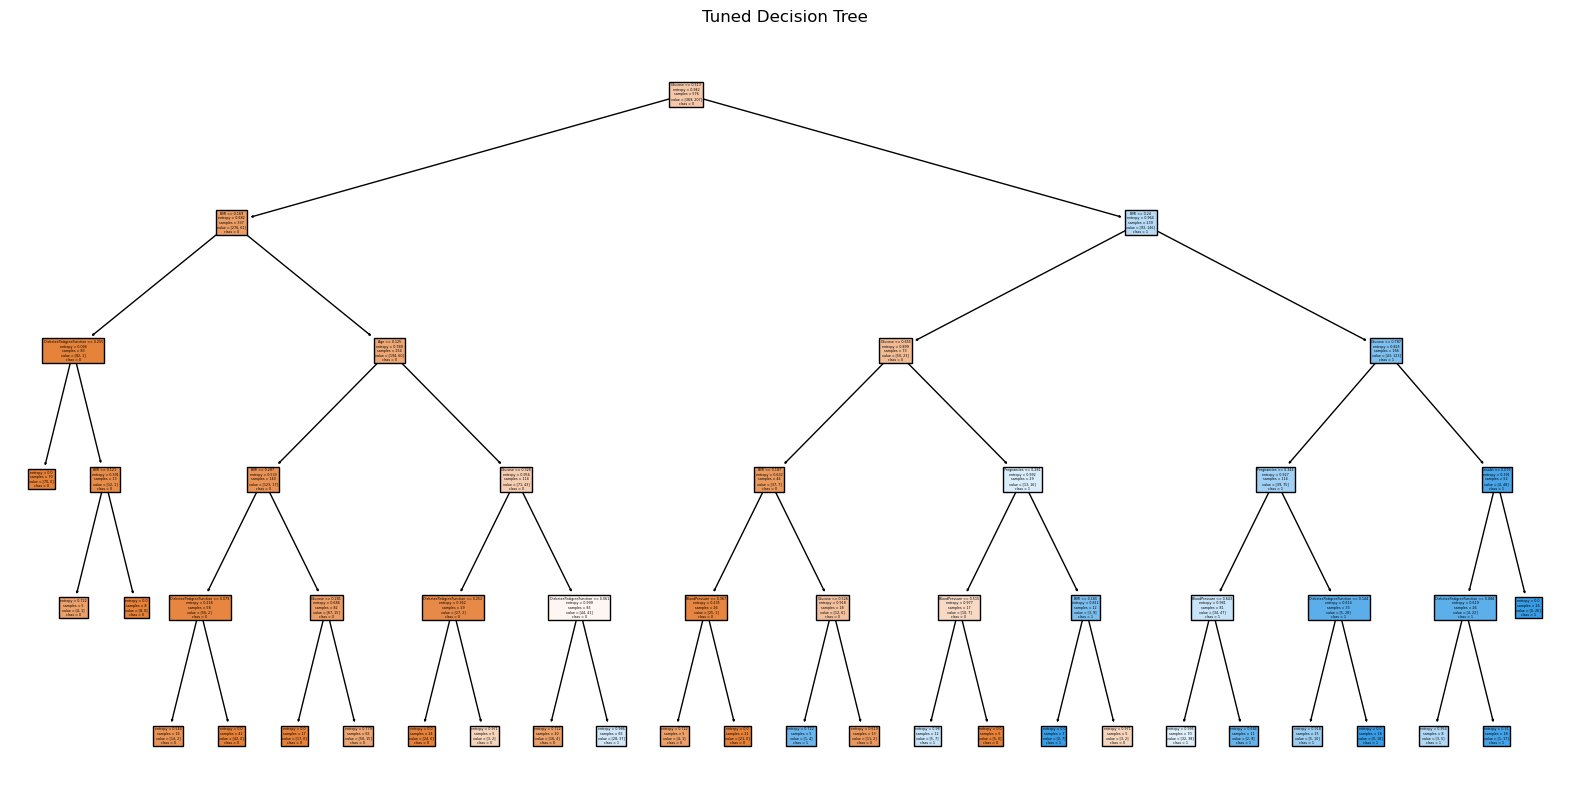

In [1104]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf, filled=True, feature_names=x.columns, class_names=['0', '1','2'])
plt.title('Tuned Decision Tree')
plt.show()

In [1105]:
# Evaluate the best model on the test set
y_pred_best = best_clf.predict(x_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.71875
Precision: 0.7206728160607705
Recall: 0.7544737830058816
Confusion Matrix:
 [[86 45]
 [ 9 52]]
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.66      0.76       131
           1       0.54      0.85      0.66        61

    accuracy                           0.72       192
   macro avg       0.72      0.75      0.71       192
weighted avg       0.79      0.72      0.73       192



In [1106]:
test_score_decisiontreetuned=grid_search.score(x_test, y_test)

In [1107]:
test_score_decisiontreetuned

0.71875

In [1108]:
train_score_decisiontreetuned=grid_search.score(x_train, y_train)

In [1109]:
train_score_decisiontreetuned

0.8159722222222222

In [1110]:
print("f1:", f1_score(y_test, y_pred, average='macro'))

f1: 0.6584440227703985


In [1111]:
# With Hyperparameter Tuning
param_grid = {
    'max_depth': [3, 5, 7, 2],
    'min_samples_split': [2, 3, 7, 10]

}

In [1112]:
param_grid

{'max_depth': [3, 5, 7, 2], 'min_samples_split': [2, 3, 7, 10]}

In [1120]:
grid_search1 = GridSearchCV(estimator=clf, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [1121]:
grid_search1.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 2],
                         'min_samples_split': [2, 3, 7, 10]},
             scoring='accuracy', verbose=1)

In [1122]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 5, 'min_samples_split': 3}
Best Cross-Validation Score: 0.7430284857571214


In [1123]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1124]:
# Evaluate the best model using cross-validation
best_clf1 = grid_search1.best_estimator_
cv1_scores = cross_val_score(best_clf, x, y, cv=cv, scoring='accuracy')

In [1125]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv1_scores)
print("Mean Cross-Validation Score (Best Model):", cv1_scores.mean())

Cross-Validation Scores (Best Model): [0.75974026 0.76623377 0.70779221 0.69934641 0.68627451]
Mean Cross-Validation Score (Best Model): 0.7238774297597826


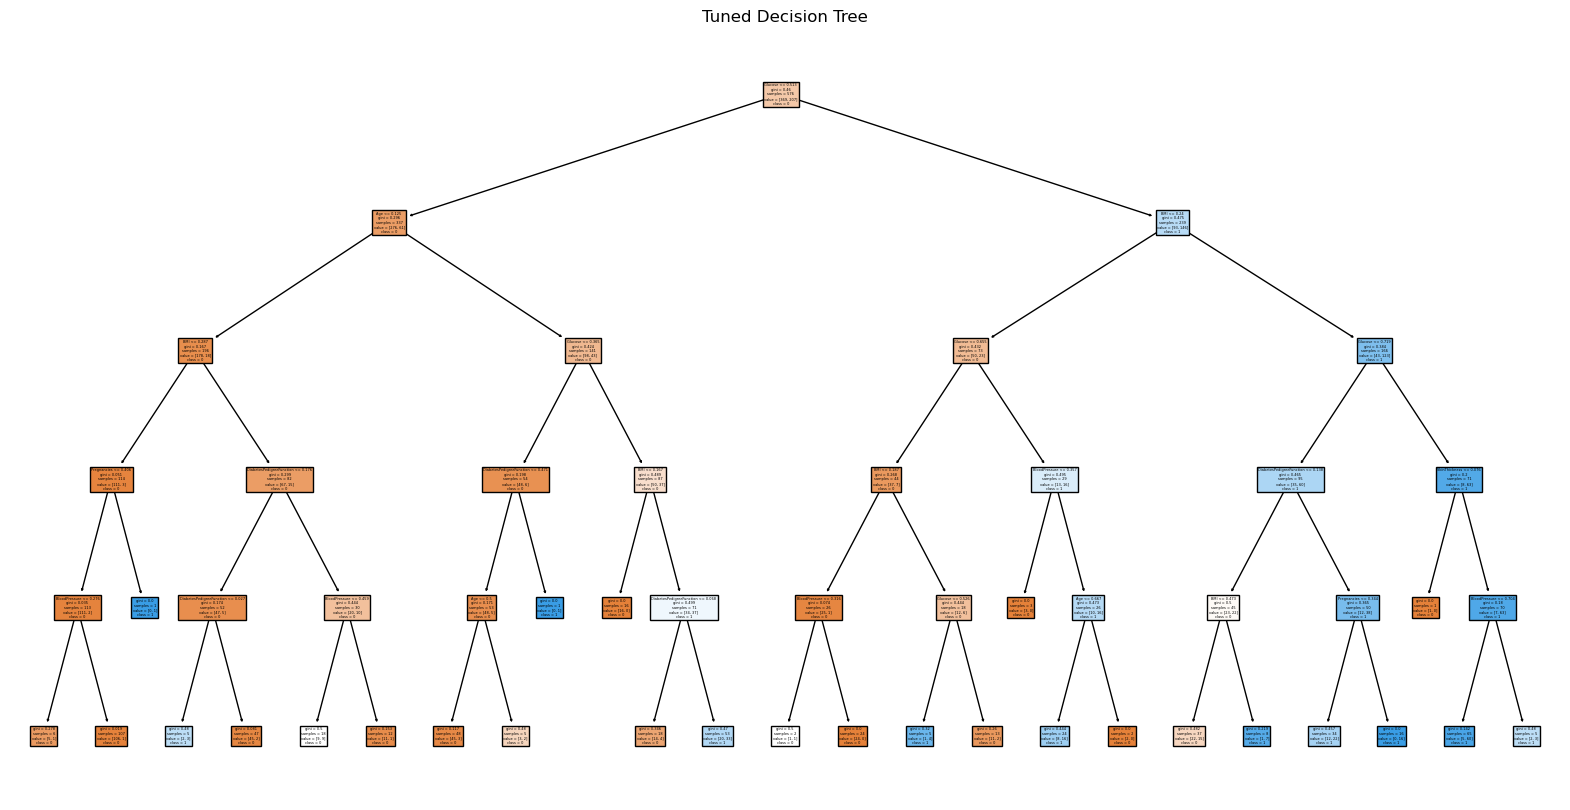

In [1126]:
# Visualizing the decision tree for the best model
plt.figure(figsize=(20, 10))
plot_tree(best_clf1, filled=True, feature_names=x.columns, class_names=['0', '1','2'])
plt.title('Tuned Decision Tree')
plt.show()

In [1127]:
# Evaluate the best model on the test set
y_pred_best = best_clf1.predict(x_test)
print("\nWith Hyperparameter Tuning - Test Set Evaluation")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Precision:", precision_score(y_test, y_pred_best, average='macro'))
print("Recall:", recall_score(y_test, y_pred_best, average='macro'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))


With Hyperparameter Tuning - Test Set Evaluation
Accuracy: 0.7395833333333334
Precision: 0.7097435897435898
Recall: 0.73032161181329
Confusion Matrix:
 [[99 32]
 [18 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.80       131
           1       0.57      0.70      0.63        61

    accuracy                           0.74       192
   macro avg       0.71      0.73      0.72       192
weighted avg       0.76      0.74      0.75       192



In [1128]:
best_clf1.score(x_test, y_test)

0.7395833333333334

In [1130]:
best_clf1.score(x_train, y_train)

0.8402777777777778

In [1139]:
#applying the random forest to check wether the accuracy score is better or not 

In [1146]:
from sklearn.ensemble import RandomForestClassifier

In [1147]:
rf = RandomForestClassifier(random_state=42)

In [1148]:
rf.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [1149]:
y_pred_rf = rf.predict(x_test)

In [1150]:
rf.score(x_test, y_test)

0.75

In [1151]:
rf.score(x_train, y_train)

1.0

In [1152]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))
print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred_rf))

Confusion Matrix:
[[101  30]
 [ 18  43]]

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.77      0.81       131
           1       0.59      0.70      0.64        61

    accuracy                           0.75       192
   macro avg       0.72      0.74      0.72       192
weighted avg       0.77      0.75      0.76       192


Accuracy Score:
0.75


In [1153]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.75


In [1154]:
print('precision_score:', metrics.precision_score(y_test, y_pred_rf,average='macro'))

precision_score: 0.7188902958443651


In [1155]:
print('recall_score:',metrics.recall_score(y_test, y_pred_rf,average='macro'))

recall_score: 0.7379551995995495


In [1156]:
print('f1:',metrics.f1_score(y_test, y_pred_rf,average='macro'))

f1: 0.7248955223880597


In [1157]:
#precision score higher than recall score 

In [1158]:
#apply random forest with hyperparameter tuning

In [1159]:
from sklearn.ensemble import RandomForestClassifier

In [1160]:
clf_tuned = RandomForestClassifier(random_state=42)

In [1161]:
# With Hyperparameter Tuning
param_grid = {
    'n_estimators': [2, 3, 4, 5],
    'max_depth': [2, 3, 4, 5]

}

In [1165]:
from sklearn.model_selection import train_test_split, GridSearchCV

In [1167]:
grid_search1 = GridSearchCV(estimator=clf_tuned, param_grid=param_grid, 
                           cv=5, n_jobs=-1, verbose=1, scoring='accuracy')

In [1168]:
grid_search1.fit(x_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [2, 3, 4, 5]},
             scoring='accuracy', verbose=1)

In [1169]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 2, 'n_estimators': 2}
Best Cross-Validation Score: 0.7603598200899551


In [1170]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, StratifiedKFold

In [1172]:
cv1 = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [1173]:
# Evaluate the best model using cross-validation
best_clf_tuned = grid_search1.best_estimator_
cv1_scores = cross_val_score(best_clf_tuned, x, y, cv=cv, scoring='accuracy')

In [1174]:
# Print cross-validation scores and mean score
print("Cross-Validation Scores (Best Model):", cv1_scores)
print("Mean Cross-Validation Score (Best Model):", cv1_scores.mean())

Cross-Validation Scores (Best Model): [0.75324675 0.80519481 0.74675325 0.75163399 0.73202614]
Mean Cross-Validation Score (Best Model): 0.7577709871827519


In [1177]:
print('Accuracy:', metrics.accuracy_score(y_test, y_pred_rf))

Accuracy: 0.75


In [1178]:
print('precision_score:', metrics.precision_score(y_test, y_pred_rf,average='macro'))

precision_score: 0.7188902958443651


In [1185]:
print('recall_score:',metrics.recall_score(y_test, y_pred_rf, average='macro'))

recall_score: 0.7379551995995495


In [1194]:
print('f1:',metrics.f1_score(y_test, y_pred,average='macro'))

f1: 0.6584440227703985


In [1196]:
grid_search1.score(x_test, y_test)

0.7552083333333334

In [1198]:
grid_search1.score(x_train, y_train)

0.7465277777777778

In [1199]:
#random forest default gives the best accuracy score without overfitting scenario 

In [1200]:
# feature importances with the help of random forest 

In [1204]:
# training the random forest classifier model 
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [1208]:
# Getting feature importances
importances = rf.feature_importances_

In [1211]:
importances

array([0.07982085, 0.28676105, 0.08596898, 0.07380042, 0.07397914,
       0.15583241, 0.1202882 , 0.12354894])

In [1212]:
#creating a data frame for feature importances

In [1213]:
feature_importances = pd.DataFrame({'feature': x.columns, 'importance': importances})

In [1215]:
feature_importances

,feature,importance
0,Pregnancies,0.079821
1,Glucose,0.286761
2,BloodPressure,0.085969
3,SkinThickness,0.073800
4,Insulin,0.073979
5,BMI,0.155832
6,DiabetesPedigreeFunction,0.120288
7,Age,0.123549


In [1216]:
# sorting by importance

In [1217]:
feature_importances = feature_importances.sort_values(by='importance', ascending=False)

In [1218]:
feature_importances

,feature,importance
1,Glucose,0.286761
5,BMI,0.155832
7,Age,0.123549
6,DiabetesPedigreeFunction,0.120288
2,BloodPressure,0.085969
0,Pregnancies,0.079821
4,Insulin,0.073979
3,SkinThickness,0.073800


In [1221]:
# ploting the feature importances 

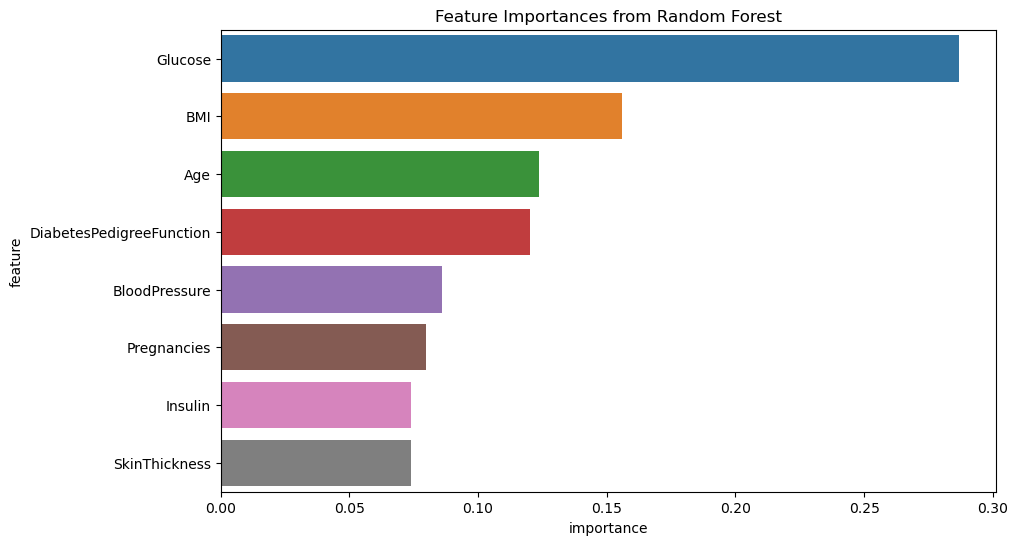

In [1225]:
# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importances)
plt.title('Feature Importances from Random Forest')
plt.show()

In [1226]:
from sklearn.svm import SVC

In [1227]:
from sklearn import metrics
svc=SVC() # Default hyperparameters

In [1229]:
svc=SVC()

In [1243]:
svc.fit(x_train, y_train)

SVC()

In [1244]:
y_pred=svc.predict(x_test)

In [1245]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       131
           1       0.61      0.59      0.60        61

    accuracy                           0.75       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.75      0.75      0.75       192



In [1246]:
confusion_matrix_best=pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_best

Predicted,0,1
Actual,,
0,108,23
1,25,36


In [1251]:
print(metrics.accuracy_score(y_test,y_pred))

0.75


In [1252]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))

Accuracy Score: 0.75


In [1255]:
y_pred

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [1257]:
y_test

98     0
739    1
741    0
16     1
659    1
      ..
117    0
486    0
646    1
401    0
576    0
Name: Outcome, Length: 192, dtype: int64

In [1259]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.75

In [1261]:
svc.score(x_test, y_test)

0.75

In [1263]:
svc.score(x_train, y_train)

0.796875

In [1265]:
# there is not that much overfitting 

In [1267]:
# applying SVM model with kernel with linear 

In [1269]:
svc_linear =SVC(kernel='linear')

In [1271]:
svc_linear.fit(x_train,y_train)

SVC(kernel='linear')

In [1273]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.2500,0.470968,0.571429,0.271739,0.019832,0.466258,0.114432,0.266667
113,0.1875,0.206452,0.387755,0.173913,0.019832,0.323108,0.133646,0.066667
564,0.1250,0.303226,0.571429,0.173913,0.019832,0.290389,0.223313,0.100000
620,0.0625,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
505,0.5625,0.200000,0.591837,0.173913,0.019832,0.308793,0.078992,0.283333
...,...,...,...,...,...,...,...,...
494,0.1250,0.232258,0.489796,0.173913,0.019832,0.282209,0.040991,0.016667
116,0.2500,0.516129,0.510204,0.173913,0.019832,0.323108,0.060632,0.283333
210,0.0625,0.238710,0.367347,0.163043,0.019832,0.194274,0.090521,0.066667
686,0.1250,0.554839,0.408163,0.173913,0.019832,0.100204,0.100769,0.016667


In [1275]:
y_train

349    1
113    0
564    0
620    0
505    0
      ..
494    0
116    1
210    0
686    0
178    0
Name: Outcome, Length: 576, dtype: int64

In [1277]:
y_pred_linear=svc_linear.predict(x_test)

In [1279]:
y_pred_linear

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [1281]:
print("Classification Report:\n", classification_report(y_test, y_pred_linear))

Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.84      0.83       131
           1       0.64      0.61      0.62        61

    accuracy                           0.77       192
   macro avg       0.73      0.72      0.73       192
weighted avg       0.76      0.77      0.76       192



In [1283]:
confusion_matrix_svc=pd.crosstab(y_test, y_pred_linear, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_svc

Predicted,0,1
Actual,,
0,110,21
1,24,37


In [1285]:
print(metrics.accuracy_score(y_test,y_pred_linear))

0.765625


In [1287]:
y_test

98     0
739    1
741    0
16     1
659    1
      ..
117    0
486    0
646    1
401    0
576    0
Name: Outcome, Length: 192, dtype: int64

In [1289]:
y_pred_linear

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [1291]:
svc_linear.score(x_test, y_test)

0.765625

In [1293]:
x_test

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
98,0.3125,0.316129,0.265306,0.250000,0.060096,0.214724,0.118702,0.033333
739,0.0000,0.374194,0.510204,0.173913,0.019832,0.435583,0.091802,0.350000
741,0.1250,0.374194,0.204082,0.141304,0.096154,0.257669,0.137489,0.083333
16,0.1250,0.477419,0.612245,0.434783,0.259615,0.564417,0.201964,0.166667
659,0.1250,0.232258,0.591837,0.260870,0.067308,0.327198,0.518360,0.100000
...,...,...,...,...,...,...,...,...
117,0.2500,0.219355,0.244898,0.173913,0.019832,0.316973,0.245944,0.066667
486,0.0000,0.612903,0.387755,0.369565,0.560096,0.460123,0.195559,0.000000
646,0.0000,0.793548,0.510204,0.108696,0.156250,0.106339,0.157558,0.200000
401,0.3125,0.600000,0.377551,0.173913,0.019832,0.122699,0.031170,0.566667


In [1295]:
svc_linear.score(x_train, y_train)

0.7708333333333334

In [1297]:
print("Accuracy:", accuracy_score(y_test, y_pred_linear))

Accuracy: 0.765625


In [1299]:
print('precision_score:',metrics.precision_score(y_test, y_pred_linear))

precision_score: 0.6379310344827587


In [1301]:
print('recall_score:',metrics.recall_score(y_test, y_pred_linear))

recall_score: 0.6065573770491803


In [1303]:
print('f1:',metrics.f1_score(y_test, y_pred_linear,average='macro'))

f1: 0.7260187093705406


In [1305]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.2500,0.470968,0.571429,0.271739,0.019832,0.466258,0.114432,0.266667
113,0.1875,0.206452,0.387755,0.173913,0.019832,0.323108,0.133646,0.066667
564,0.1250,0.303226,0.571429,0.173913,0.019832,0.290389,0.223313,0.100000
620,0.0625,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
505,0.5625,0.200000,0.591837,0.173913,0.019832,0.308793,0.078992,0.283333
...,...,...,...,...,...,...,...,...
494,0.1250,0.232258,0.489796,0.173913,0.019832,0.282209,0.040991,0.016667
116,0.2500,0.516129,0.510204,0.173913,0.019832,0.323108,0.060632,0.283333
210,0.0625,0.238710,0.367347,0.163043,0.019832,0.194274,0.090521,0.066667
686,0.1250,0.554839,0.408163,0.173913,0.019832,0.100204,0.100769,0.016667


In [1307]:
# applying SVM model with kernel with RBF 

In [1309]:
svc_rbf =SVC(kernel='rbf')

In [1311]:
svc_rbf.fit(x_train,y_train)

SVC()

In [1313]:
y_pred_rbf=svc_rbf.predict(x_test)

In [1315]:
print("Accuracy:", accuracy_score(y_test, y_pred_rbf))

Accuracy: 0.75


In [1317]:
print('precision_score:',metrics.precision_score(y_test, y_pred_rbf))

precision_score: 0.6101694915254238


In [1319]:
print('recall_score:',metrics.recall_score(y_test, y_pred_rbf))

recall_score: 0.5901639344262295


In [1321]:
print('f1:',metrics.f1_score(y_test, y_pred_rbf,average='macro'))

f1: 0.7090909090909091


In [1323]:
print("Classification Report:\n", classification_report(y_test, y_pred_rbf))

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.82      0.82       131
           1       0.61      0.59      0.60        61

    accuracy                           0.75       192
   macro avg       0.71      0.71      0.71       192
weighted avg       0.75      0.75      0.75       192



In [1325]:
confusion_matrix_rbf=pd.crosstab(y_test, y_pred_rbf, rownames=['Actual'], colnames=['Predicted'])
confusion_matrix_rbf

Predicted,0,1
Actual,,
0,108,23
1,25,36


In [1327]:
svc_rbf.score(x_test, y_test)

0.75

In [1329]:
svc_rbf.score(x_train, y_train)

0.796875

In [1331]:
# svm with rbf fit reflected no overfitting and was able to default model with rbf as the selected kernel 

In [1333]:
# Train the KNN model

In [1335]:
from sklearn.neighbors import KNeighborsClassifier

In [1337]:
knn = KNeighborsClassifier(n_neighbors=5)

In [1339]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [1341]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.2500,0.470968,0.571429,0.271739,0.019832,0.466258,0.114432,0.266667
113,0.1875,0.206452,0.387755,0.173913,0.019832,0.323108,0.133646,0.066667
564,0.1250,0.303226,0.571429,0.173913,0.019832,0.290389,0.223313,0.100000
620,0.0625,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
505,0.5625,0.200000,0.591837,0.173913,0.019832,0.308793,0.078992,0.283333
...,...,...,...,...,...,...,...,...
494,0.1250,0.232258,0.489796,0.173913,0.019832,0.282209,0.040991,0.016667
116,0.2500,0.516129,0.510204,0.173913,0.019832,0.323108,0.060632,0.283333
210,0.0625,0.238710,0.367347,0.163043,0.019832,0.194274,0.090521,0.066667
686,0.1250,0.554839,0.408163,0.173913,0.019832,0.100204,0.100769,0.016667


In [1343]:
y_pred = knn.predict(x_test)

In [1345]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0], dtype=int64)

In [1347]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.75


In [1349]:
print('precision_score:',metrics.precision_score(y_test, y_pred))

precision_score: 0.5866666666666667


In [1351]:
print('recall_score:',metrics.recall_score(y_test, y_pred))

recall_score: 0.7213114754098361


In [1353]:
print('f1:',metrics.f1_score(y_test, y_pred))

f1: 0.6470588235294118


In [1355]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[100  31]
 [ 17  44]]


In [1357]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.76      0.81       131
           1       0.59      0.72      0.65        61

    accuracy                           0.75       192
   macro avg       0.72      0.74      0.73       192
weighted avg       0.77      0.75      0.76       192



In [1359]:
knn.score(x_test, y_test)

0.75

In [1361]:
knn.score(x_train, y_train)

0.8038194444444444

In [1363]:
# Applying KNN classifier to check whether it can capture the historical data by applying a range of neighboors 

In [1364]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
neighbors = np.arange(1,9)
neighbors

array([1, 2, 3, 4, 5, 6, 7, 8])

In [1366]:
# Set up arrays to store train and test accuracies for different values of K.

In [1369]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [1371]:
# Generating a for loop with the list of neighbours to do the train data fit for each of the K values and find out their

In [1373]:
# train and test accuracies.

In [1375]:
for i,k in enumerate(neighbors):   
    
    # Enumerate: We are using a loop to iterate over different values of k for the number of neighbours in a K nearest Neighbors 
    # classifier.
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Using scikitlearn's KNeighborsClassifier, we are training the classifier with different values of
    # k and evaluating
    # it's performance.
    
    knn.fit(x_train, y_train)
    
    
    train_accuracy[i] = knn.score(x_train, y_train)
    
   
    test_accuracy[i] = knn.score(x_test, y_test)

In [1376]:
train_accuracy[i]

0.8003472222222222

In [1377]:
test_accuracy[i]

0.796875

In [1378]:
# Changing the range to check the stable point of train and test score is better for any of k = greater than 8 pointers.

neighbors = np.arange(1,15)
neighbors

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [1383]:
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

In [1384]:
for i,k in enumerate(neighbors):
    
    knn = KNeighborsClassifier(n_neighbors=k)
    
    
    knn.fit(x_train, y_train)
    
    
    train_accuracy[i] = knn.score(x_train, y_train)
    
   
    test_accuracy[i] = knn.score(x_test, y_test)

In [1386]:
train_accuracy[i]

0.7881944444444444

In [1387]:
test_accuracy[i]

0.7864583333333334

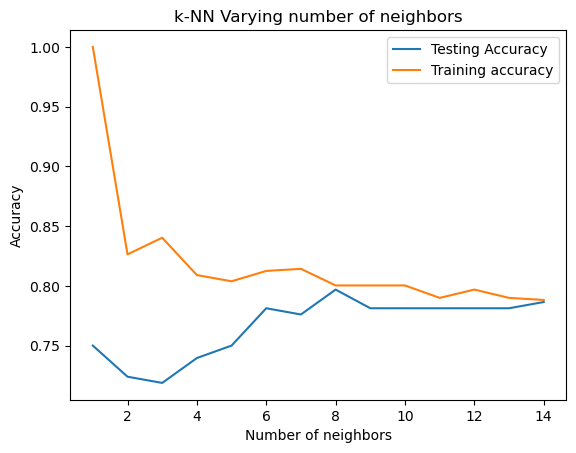

In [1388]:
# Checking for the stable train and test accuracy scores with the help of plot

plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [1389]:
# we need to fit KNN model with k = 6 to get the final best accuracy. by optimazing the stabilazed train and test score ensuring no underfitting as well as overfitting and maximazing the accuracy score 

In [1390]:
# we get k = 6 as the best knn parameter . so fitting the knn model with the best knn parameter 

In [1391]:
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [1394]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report # Evaluation

In [1396]:
train_accuracy_knn_final = knn.score(x_train, y_train)

In [1401]:
train_accuracy_knn_final

0.8125

In [1403]:
test_accuracy_knn_final = knn.score(x_test, y_test)

In [1405]:
test_accuracy_knn_final

0.78125

In [1406]:
y_pred = knn.predict(x_test)

In [1409]:
# Checking evaluation metrics for knn with k =6

In [1412]:
accuracy_knn = accuracy_score(y_test, y_pred)

In [1414]:
accuracy_knn

0.78125

In [1416]:
precision_knn = precision_score(y_test, y_pred)

In [1419]:
precision_knn

0.6862745098039216

In [1421]:
recall_knn = recall_score(y_test, y_pred)

In [1423]:
recall_knn

0.5737704918032787

In [1425]:
f1_knn = f1_score(y_test, y_pred)

In [1427]:
f1_knn

0.625

In [1429]:
cf_knn = confusion_matrix(y_test, y_pred)

In [1431]:
from sklearn.metrics import classification_report

In [1433]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       131
           1       0.69      0.57      0.62        61

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.78       192



In [1435]:
y_pred_proba = knn.predict_proba(x_test)[:,1]

In [1437]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

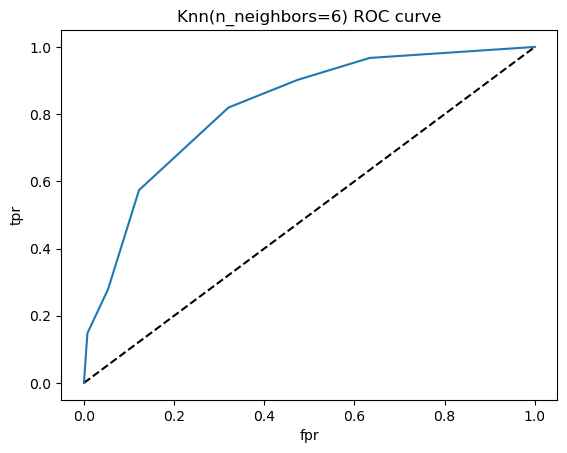

In [1439]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=6) ROC curve')
plt.show()

In [1440]:
from sklearn.metrics import roc_auc_score

In [1443]:
roc_auc_score(y_test,y_pred_proba)

0.8194844199724691

In [1445]:
# KNN with Cross Validation 

In [1447]:
# Saving the possible options of parameter to pass in the model in 'param_grid' param_grid = {'n_neighbors' : np.arange(1,50)}

In [1449]:
# Saving the instance of the class knn = KNeighborsClassifier()

In [1451]:
# Best parameters and best score
print("Best Parameters:", grid_search1.best_params_)
print("Best Cross-Validation Score:", grid_search1.best_score_)

Best Parameters: {'max_depth': 2, 'n_estimators': 2}
Best Cross-Validation Score: 0.7603598200899551


In [1453]:
knn1 = KNeighborsClassifier(
n_neighbors=6,
weights='uniform',
algorithm='auto',
leaf_size=30,
metric='minkowski',
metric_params=None,
p=2
)

In [1455]:
knn1.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=6)

In [1457]:
predictions = knn1.predict(x_test)

In [1459]:
from sklearn.metrics import confusion_matrix,f1_score,accuracy_score, classification_report # Evaluation

In [1461]:
train_accuracy_knn1_final = knn1.score(x_train, y_train)

In [1463]:
train_accuracy_knn1_final

0.8125

In [1465]:
test_accuracy_knn1_final = knn1.score(x_test, y_test)

In [1467]:
test_accuracy_knn1_final

0.78125

In [1469]:
y_pred = knn1.predict(x_test)

In [1471]:
accuracy_knn1 = accuracy_score(y_test, y_pred)

In [1473]:
accuracy_knn1

0.78125

In [1475]:
print('precision_score:',metrics.precision_score(y_test, y_pred))

precision_score: 0.6862745098039216


In [1477]:
print('recall_score:',metrics.recall_score(y_test, y_pred))

recall_score: 0.5737704918032787


In [1479]:
print('f1:',metrics.f1_score(y_test, y_pred))

f1: 0.625


In [1481]:
from sklearn.metrics import classification_report

In [1483]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       131
           1       0.69      0.57      0.62        61

    accuracy                           0.78       192
   macro avg       0.75      0.73      0.74       192
weighted avg       0.77      0.78      0.78       192



In [1485]:
# Apply Gardient boosting 

In [1487]:
from sklearn.ensemble import GradientBoostingClassifier

In [1489]:
GD = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

In [1491]:
GD.fit(x_train, y_train)

GradientBoostingClassifier(random_state=42)

In [1492]:
x_train

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
349,0.2500,0.470968,0.571429,0.271739,0.019832,0.466258,0.114432,0.266667
113,0.1875,0.206452,0.387755,0.173913,0.019832,0.323108,0.133646,0.066667
564,0.1250,0.303226,0.571429,0.173913,0.019832,0.290389,0.223313,0.100000
620,0.0625,0.438710,0.632653,0.380435,0.175481,0.413088,0.071734,0.116667
505,0.5625,0.200000,0.591837,0.173913,0.019832,0.308793,0.078992,0.283333
...,...,...,...,...,...,...,...,...
494,0.1250,0.232258,0.489796,0.173913,0.019832,0.282209,0.040991,0.016667
116,0.2500,0.516129,0.510204,0.173913,0.019832,0.323108,0.060632,0.283333
210,0.0625,0.238710,0.367347,0.163043,0.019832,0.194274,0.090521,0.066667
686,0.1250,0.554839,0.408163,0.173913,0.019832,0.100204,0.100769,0.016667


In [1495]:
y_pred = GD.predict(x_test)

In [1497]:
y_pred

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

In [1499]:
GD.score(x_test, y_test)

0.7864583333333334

In [1501]:
GD.score(x_train, y_train)

0.9236111111111112

In [1503]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7864583333333334


In [1505]:
print('precision_score:',metrics.precision_score(y_test, y_pred))

precision_score: 0.6470588235294118


In [1507]:
print('recall_score:',metrics.recall_score(y_test, y_pred))

recall_score: 0.7213114754098361


In [1509]:
print('f1:',metrics.f1_score(y_test, y_pred))

f1: 0.682170542635659


In [1511]:
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Confusion Matrix:
 [[107  24]
 [ 17  44]]


In [1513]:
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.82      0.84       131
           1       0.65      0.72      0.68        61

    accuracy                           0.79       192
   macro avg       0.75      0.77      0.76       192
weighted avg       0.79      0.79      0.79       192



In [1515]:
# ada boost classifier for our classified model 

In [1517]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics

In [1519]:
ada_clf = AdaBoostClassifier()

In [1521]:
ada_clf.fit(x_train, y_train)

AdaBoostClassifier()

In [1523]:
train_score_ada_clf = ada_clf.score(x_train, y_train)
test_score_ada_clf = ada_clf.score(x_test, y_test)

In [1525]:
train_score_ada_clf

0.8385416666666666

In [1527]:
test_score_ada_clf

0.7604166666666666

In [1529]:
y_pred_ada_clf = ada_clf.predict(x_test)

In [1531]:
print("Accuracy:", accuracy_score(y_test, y_pred_ada_clf))

Accuracy: 0.7604166666666666


In [1533]:
print('precision_score:',metrics.precision_score(y_test, y_pred_ada_clf))

precision_score: 0.6086956521739131


In [1535]:
print('recall_score:',metrics.recall_score(y_test, y_pred_ada_clf))

recall_score: 0.6885245901639344


In [1537]:
print('f1:',metrics.f1_score(y_test, y_pred_ada_clf))

f1: 0.6461538461538463


In [1539]:
print('Classification Report:\n', metrics.classification_report(y_test, y_pred_ada_clf))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred_ada_clf))

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.79      0.82       131
           1       0.61      0.69      0.65        61

    accuracy                           0.76       192
   macro avg       0.73      0.74      0.73       192
weighted avg       0.77      0.76      0.76       192

Confusion Matrix:
 [[104  27]
 [ 19  42]]


In [1541]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [1543]:
ada_tuned_clf = AdaBoostClassifier()

In [1545]:
param_grid = {
    'n_estimators': [5, 7, 9],
    'learning_rate': [0.01, 0.1]
}

In [1547]:
grid_search_tuned_ada = GridSearchCV(estimator=ada_tuned_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_tuned_ada.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.01, 0.1],
                         'n_estimators': [5, 7, 9]},
             scoring='accuracy')

In [1548]:
best_params = grid_search_tuned_ada.best_params_
best_score = grid_search_tuned_ada.best_score_
print("Best Parameters:", best_params)

Best Parameters: {'learning_rate': 0.1, 'n_estimators': 7}


In [1549]:
print("Best Cross-Validated Accuracy Score:", best_score)

Best Cross-Validated Accuracy Score: 0.7291454272863568


In [1550]:
y_pred_grid_search_tuned_ada = grid_search_tuned_ada.predict(x_test)

In [1553]:
print("Classification Report:\n", metrics.classification_report(y_test, y_pred_grid_search_tuned_ada))
print("Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_grid_search_tuned_ada))
print("Accuracy:", metrics.accuracy_score(y_test, y_pred_grid_search_tuned_ada))

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.89      0.83       131
           1       0.65      0.43      0.51        61

    accuracy                           0.74       192
   macro avg       0.71      0.66      0.67       192
weighted avg       0.73      0.74      0.73       192

Confusion Matrix:
 [[117  14]
 [ 35  26]]
Accuracy: 0.7447916666666666


In [1557]:
# Re-fitting the model with the best parameters and evaluate
ada_tuned_clf_best_params = AdaBoostClassifier(**best_params)
ada_tuned_clf_best_params.fit(x_train, y_train)

AdaBoostClassifier(learning_rate=0.1, n_estimators=7)

In [1558]:
train_score_ada_clf_best_params = ada_tuned_clf_best_params.score(x_train, y_train)
test_score_ada_clf_best_params = ada_tuned_clf_best_params.score(x_test, y_test)

In [1561]:
y_pred_ada_clf_best_params = ada_tuned_clf_best_params.predict(x_test)
print("Training Accuracy:", train_score_ada_clf_best_params)
print("Test Accuracy:", test_score_ada_clf_best_params)
print("Final Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_ada_clf_best_params))

Training Accuracy: 0.7534722222222222
Test Accuracy: 0.7447916666666666
Final Confusion Matrix:
 [[117  14]
 [ 35  26]]


In [1563]:
precision = metrics.precision_score(y_test, y_pred_ada_clf_best_params)
recall = metrics.recall_score(y_test, y_pred_ada_clf_best_params)
f1 = metrics.f1_score(y_test, y_pred_ada_clf_best_params)

In [1565]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.65
Recall: 0.4262295081967213
F1 Score: 0.5148514851485149


In [1567]:
# Gradient Boosting

In [1569]:
from sklearn.ensemble import GradientBoostingClassifier

In [1571]:
gradient_clf = GradientBoostingClassifier()

In [1573]:
gradient_clf.fit(x_train,y_train)

GradientBoostingClassifier()

In [1574]:
train_score_gradient_clf = gradient_clf.score(x_train,y_train)

In [1577]:
test_score_gradient_clf = gradient_clf.score(x_test,y_test)

In [1579]:
train_score_gradient_clf

0.9236111111111112

In [1581]:
test_score_gradient_clf

0.78125

In [1583]:
y_pred_gradient_clf = gradient_clf.predict(x_test)

In [1585]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_gradient_clf))

MSE:  0.21875


In [1587]:
# Hyperparameter tuning on Gradient boosting

In [1589]:
gradient_tuned_clf = GradientBoostingClassifier()

In [1591]:
param_grid = {
    'n_estimators': [2, 3, 4],
    'learning_rate': [0.001, 0.01]
    #'max_depth': [5, 7, 11],
    #'loss': ['deviance', 'log_loss']  
}

In [1593]:
grid_search_tuned_gradient = GridSearchCV(estimator=gradient_tuned_clf, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search_tuned_gradient.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.001, 0.01],
                         'n_estimators': [2, 3, 4]},
             scoring='accuracy')

In [1594]:
grid_search_tuned_gradient.best_params_

{'learning_rate': 0.001, 'n_estimators': 2}

In [1597]:
grid_search_tuned_gradient.best_score_

0.6406296851574212

In [1599]:
y_pred_grid_search_tuned_gradient = grid_search_tuned_gradient.predict(x_test)

In [1601]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_grid_search_tuned_gradient))

MSE:  0.3177083333333333


In [1603]:
gradient_tuned_clf_best_params = GradientBoostingClassifier(learning_rate= 0.001, n_estimators=2)

In [1605]:
gradient_tuned_clf_best_params.fit(x_train,y_train)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=2)

In [1607]:
train_score_gradient_clf_best_params = gradient_tuned_clf_best_params.score(x_train,y_train)

In [1609]:
train_score_gradient_clf_best_params

0.640625

In [1611]:
test_score_gradient_clf_best_params = gradient_tuned_clf_best_params.score(x_test,y_test)

In [1613]:
test_score_gradient_clf_best_params

0.6822916666666666

In [1615]:
y_pred_gradient_clf_best_params = gradient_tuned_clf_best_params.predict(x_test)

In [1617]:
print("Final Confusion Matrix:\n", metrics.confusion_matrix(y_test, y_pred_ada_clf_best_params))

Final Confusion Matrix:
 [[117  14]
 [ 35  26]]


In [1619]:
precision = metrics.precision_score(y_test, y_pred_gradient_clf_best_params)
recall = metrics.recall_score(y_test, y_pred_gradient_clf_best_params)
f1 = metrics.f1_score(y_test, y_pred_gradient_clf_best_params)

C:\Users\yasmi\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [1621]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.0
Recall: 0.0
F1 Score: 0.0


In [1623]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_gradient_clf_best_params))

MSE:  0.3177083333333333


In [1625]:
# Applying XG Boost Classifer 

In [1627]:
# Default parameters for XG Boost

In [1629]:
import xgboost as xgb
from xgboost import XGBClassifier

In [1631]:
xgb_clf = XGBClassifier()

In [1633]:
xgb_clf.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1634]:
train_score_xgb_clf = xgb_clf.score(x_train,y_train)

In [1637]:
train_score_xgb_clf

1.0

In [1639]:
test_score_xgb_clf = xgb_clf.score(x_test,y_test)

In [1641]:
test_score_xgb_clf

0.7395833333333334

In [1643]:
y_pred_xgb_clf = xgb_clf.predict(x_test)

In [1645]:
precision = metrics.precision_score(y_test, y_pred_xgb_clf)
recall = metrics.recall_score(y_test, y_pred_xgb_clf)
f1 = metrics.f1_score(y_test, y_pred_xgb_clf)

In [1647]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5753424657534246
Recall: 0.6885245901639344
F1 Score: 0.626865671641791


In [1649]:
print('MSE: ',metrics.mean_squared_error(y_test, y_pred_xgb_clf))

MSE:  0.2604166666666667


In [1651]:
# Hyperparameter tuning for XG Boost

In [1653]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [1655]:
xgb_tuned_clf = XGBClassifier()

In [1657]:
param_grid = {
    'n_estimators': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5]
    # Additional parameters can be uncommented and added if desired:
    # 'min_child_weight': [1, 3, 5],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
    # 'lambda': [0, 1, 4],  # Regularization parameters
    # 'alpha': [0, 1, 4]
}

In [1659]:
grid_search_tuned_xgb = GridSearchCV(
    estimator=xgb_tuned_clf, 
    param_grid=param_grid, 
    cv=3, 
    scoring='accuracy')

In [1661]:
grid_search_tuned_xgb.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
                         'max_depth': [3, 4, 5], 'n_estimators': [2, 3, 4]},
             scoring='accuracy')

In [1662]:
print("Best parameters found (Grid Search):", grid_search_tuned_xgb.best_params_)
print("Best Accuracy score (Grid Search):", grid_search_tuned_xgb.best_score_)

Best parameters found (Grid Search): {'learning_rate': 0.5, 'max_depth': 5, 'n_estimators': 4}
Best Accuracy score (Grid Search): 0.765625


In [1663]:
y_pred_grid_search_tuned_xgb = grid_search_tuned_xgb.predict(x_test)

In [1664]:
print("Accuracy (Grid Search):", accuracy_score(y_test, y_pred_grid_search_tuned_xgb))
print("Classification Report (Grid Search):\n", classification_report(y_test, y_pred_grid_search_tuned_xgb))
print("Confusion Matrix (Grid Search):\n", confusion_matrix(y_test, y_pred_grid_search_tuned_xgb))

Accuracy (Grid Search): 0.6979166666666666
Classification Report (Grid Search):
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       131
           1       0.52      0.67      0.59        61

    accuracy                           0.70       192
   macro avg       0.67      0.69      0.67       192
weighted avg       0.73      0.70      0.71       192

Confusion Matrix (Grid Search):
 [[93 38]
 [20 41]]


In [1665]:
param_dist = {
    'n_estimators': [2, 3, 4],
    'learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0],
    'max_depth': [3, 4, 5]
    # Additional parameters can be uncommented and added if desired:
    # 'min_child_weight': [1, 3, 5],
    # 'subsample': [0.8, 1.0],
    # 'colsample_bytree': [0.8, 1.0],
    # 'lambda': [0, 1, 4],
    # 'alpha': [0, 1, 4]
}

In [1666]:
random_search_tuned_xgb = RandomizedSearchCV(
    estimator=XGBClassifier(), 
    param_distributions=param_dist, 
    n_iter=3, 
    cv=3, 
    scoring='accuracy',  # Accuracy for classification
    random_state=42,
    n_jobs=-1
)
random_search_tuned_xgb.fit(x_train, y_train)

RandomizedSearchCV(cv=3,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, device=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           max_delta_step=None, max_depth=None,
                                           max_leaves=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           multi_strategy=None,
                                           n_estimators=None, n_jobs=None,
                                           num_parallel_tree=None,
                                           random_state=None, ...),
                   n_iter=3, n_jobs=-1,
                   param_distributions={'learning_rate': [0.01, 0.05, 0.1, 0.5,
                                                          1.0],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [2, 3, 4]},
                   random_state=42, scoring='accuracy')

In [1667]:
print("Best parameters found (Random Search):", random_search_tuned_xgb.best_params_)
print("Best Accuracy score (Random Search):", random_search_tuned_xgb.best_score_)

Best parameters found (Random Search): {'n_estimators': 2, 'max_depth': 4, 'learning_rate': 1.0}
Best Accuracy score (Random Search): 0.7569444444444443


In [1668]:
y_pred_random_search_tuned_xgb = random_search_tuned_xgb.predict(x_test)

In [1669]:
print("Accuracy (Random Search):", accuracy_score(y_test, y_pred_random_search_tuned_xgb))
print("Classification Report (Random Search):\n", classification_report(y_test, y_pred_random_search_tuned_xgb))
print("Confusion Matrix (Random Search):\n", confusion_matrix(y_test, y_pred_random_search_tuned_xgb))

Accuracy (Random Search): 0.7395833333333334
Classification Report (Random Search):
               precision    recall  f1-score   support

           0       0.81      0.81      0.81       131
           1       0.59      0.59      0.59        61

    accuracy                           0.74       192
   macro avg       0.70      0.70      0.70       192
weighted avg       0.74      0.74      0.74       192

Confusion Matrix (Random Search):
 [[106  25]
 [ 25  36]]


In [1670]:
# Using the best model parameters to train and evaluate
xgb_tuned_clf_best_params = XGBClassifier(**grid_search_tuned_xgb.best_params_)
xgb_tuned_clf_best_params.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=4, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [1671]:
# Train and test accuracy with the best parameters from grid search
train_score_xgb_clf_best_params = xgb_tuned_clf_best_params.score(x_train, y_train)
test_score_xgb_clf_best_params = xgb_tuned_clf_best_params.score(x_test, y_test)
y_pred_xgb_clf_best_params = xgb_tuned_clf_best_params.predict(x_test)

In [1677]:
print("Train Accuracy (Best Params):", train_score_xgb_clf_best_params)
print("Test Accuracy (Best Params):", test_score_xgb_clf_best_params)
print("Classification Report (Best Params):\n", classification_report(y_test, y_pred_xgb_clf_best_params))
print("Confusion Matrix (Best Params):\n", confusion_matrix(y_test, y_pred_xgb_clf_best_params))

Train Accuracy (Best Params): 0.8923611111111112
Test Accuracy (Best Params): 0.6979166666666666
Classification Report (Best Params):
               precision    recall  f1-score   support

           0       0.82      0.71      0.76       131
           1       0.52      0.67      0.59        61

    accuracy                           0.70       192
   macro avg       0.67      0.69      0.67       192
weighted avg       0.73      0.70      0.71       192

Confusion Matrix (Best Params):
 [[93 38]
 [20 41]]


In [1685]:
precision = metrics.precision_score(y_test, y_pred_xgb_clf_best_params)
recall = metrics.recall_score(y_test, y_pred_xgb_clf_best_params)
f1 = metrics.f1_score(y_test, y_pred_xgb_clf_best_params)

In [1686]:
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.5189873417721519
Recall: 0.6721311475409836
F1 Score: 0.5857142857142856
